In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb

import sys, os
root_dir = os.path.abspath("..")
if root_dir not in sys.path:
    sys.path.append(root_dir)

from fci import *
import pandas as pd

from IPython.display import display, Markdown

In [3]:
bn = gum.loadBN("instances/bn-20n-20a-2.bif")
bn

(pyagrum.BayesNet@0x12297b800) BN{nodes: 20, arcs: 20, domainSize: 10^9.28666, dim: 132, mem: 1Ko 624o}

In [4]:
from tqdm import tqdm
for i in tqdm(range(10)):
    gum.generateSample(bn, 1_000_000, f"data/bn-20n-20a-2-test{i+1}.csv")

100%|███████████████████████████████████████████| 10/10 [00:40<00:00,  4.05s/it]


CPU times: user 22.3 s, sys: 1.15 s, total: 23.4 s
Wall time: 2.88 s
CPU times: user 16.6 s, sys: 849 ms, total: 17.4 s
Wall time: 2.03 s


## Results of the data/bn-20n-20a-2-test5.csv

### Markov equivalence class (PAG)

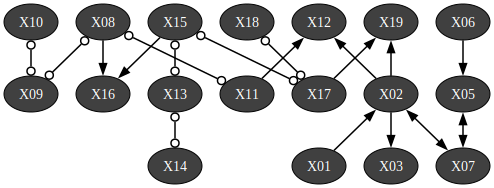

### Causal differences

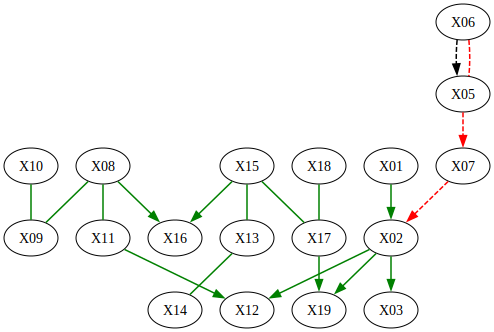

CPU times: user 23 s, sys: 1.19 s, total: 24.2 s
Wall time: 2.75 s
CPU times: user 16.5 s, sys: 889 ms, total: 17.4 s
Wall time: 2 s


## Results of the data/bn-20n-20a-2-test4.csv

### Markov equivalence class (PAG)

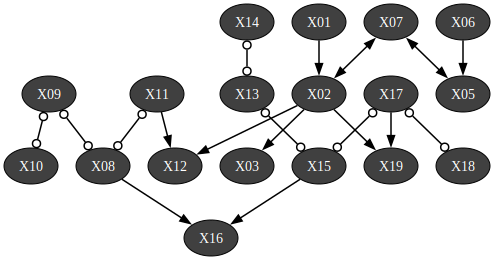

### Causal differences

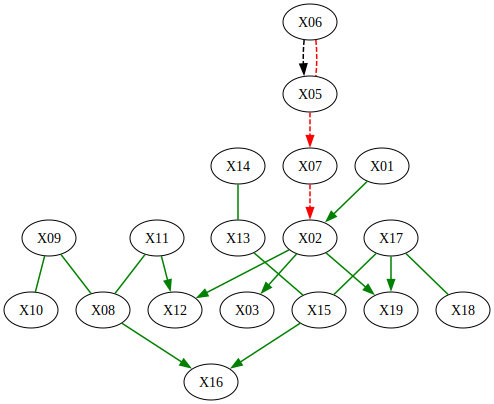

CPU times: user 22.6 s, sys: 1.16 s, total: 23.8 s
Wall time: 2.72 s
CPU times: user 29.4 s, sys: 1.58 s, total: 30.9 s
Wall time: 3.57 s


## Results of the data/bn-20n-20a-2-test6.csv

### Markov equivalence class (PAG)

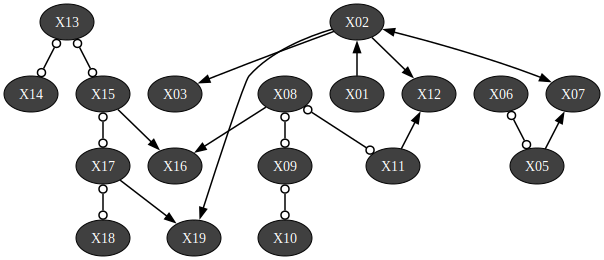

### Causal differences

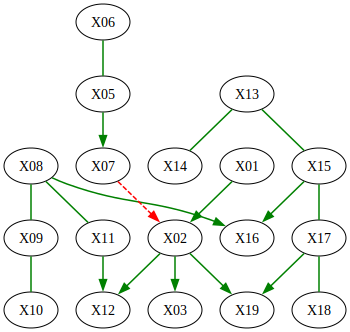

CPU times: user 24.4 s, sys: 1.17 s, total: 25.6 s
Wall time: 2.7 s
CPU times: user 9.56 s, sys: 464 ms, total: 10 s
Wall time: 1.08 s


## Results of the data/bn-20n-20a-2-test7.csv

### Markov equivalence class (PAG)

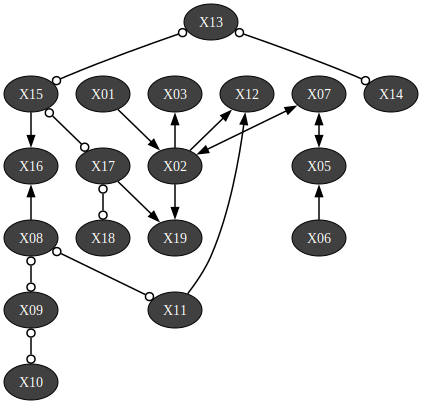

### Causal differences

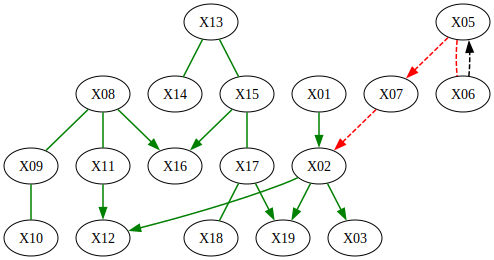

CPU times: user 24.8 s, sys: 1.24 s, total: 26.1 s
Wall time: 2.84 s
CPU times: user 8.98 s, sys: 461 ms, total: 9.44 s
Wall time: 1.07 s


## Results of the data/bn-20n-20a-2-test3.csv

### Markov equivalence class (PAG)

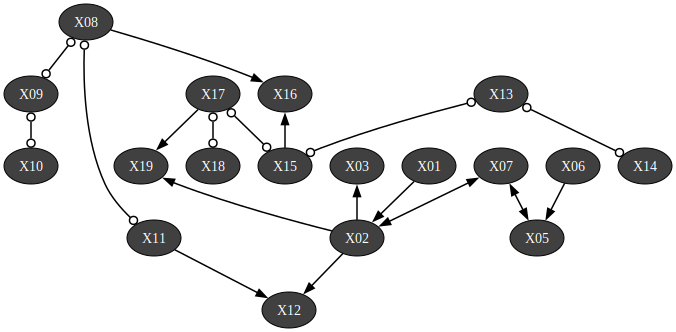

### Causal differences

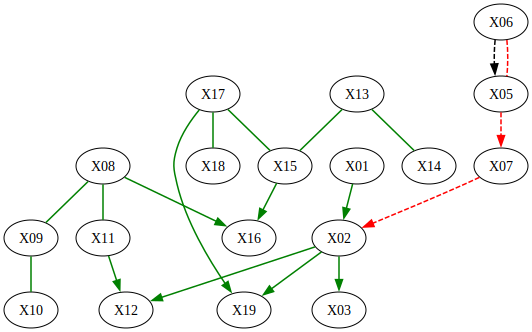

CPU times: user 24.5 s, sys: 1.16 s, total: 25.7 s
Wall time: 2.71 s
CPU times: user 21.4 s, sys: 1.1 s, total: 22.5 s
Wall time: 2.48 s


## Results of the data/bn-20n-20a-2-test2.csv

### Markov equivalence class (PAG)

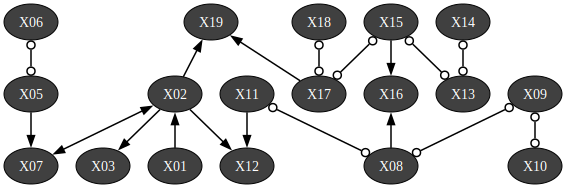

### Causal differences

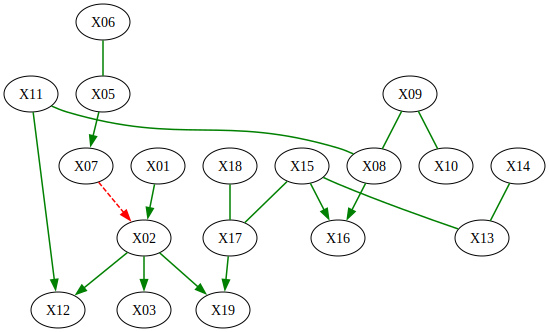

CPU times: user 23.6 s, sys: 1.17 s, total: 24.7 s
Wall time: 2.69 s
CPU times: user 38.1 s, sys: 2.31 s, total: 40.4 s
Wall time: 4.97 s


## Results of the data/bn-20n-20a-2-test1.csv

### Markov equivalence class (PAG)

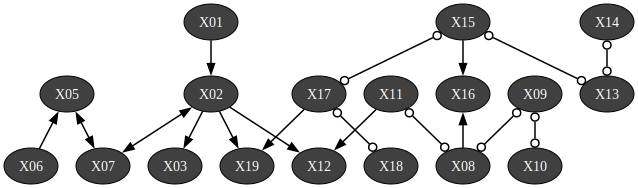

### Causal differences

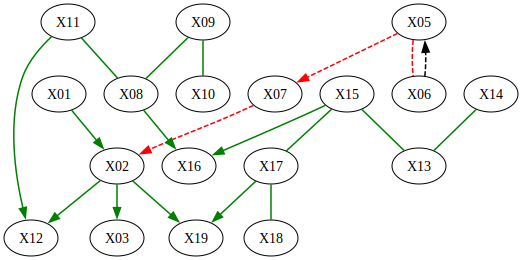

CPU times: user 23.7 s, sys: 1.2 s, total: 24.9 s
Wall time: 2.77 s
CPU times: user 10.6 s, sys: 538 ms, total: 11.1 s
Wall time: 1.26 s


## Results of the data/bn-20n-20a-2-test10.csv

### Markov equivalence class (PAG)

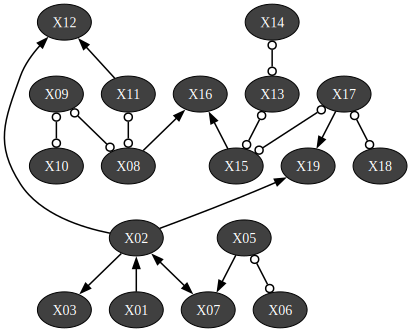

### Causal differences

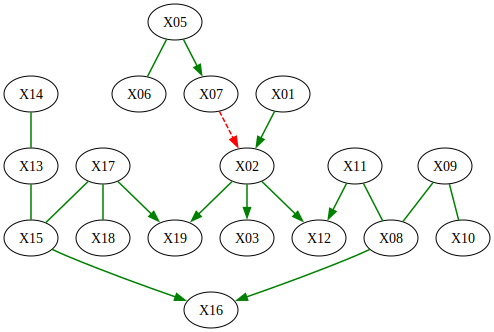

CPU times: user 24.1 s, sys: 1.2 s, total: 25.3 s
Wall time: 2.77 s
CPU times: user 13.9 s, sys: 683 ms, total: 14.5 s
Wall time: 1.56 s


## Results of the data/bn-20n-20a-2-test9.csv

### Markov equivalence class (PAG)

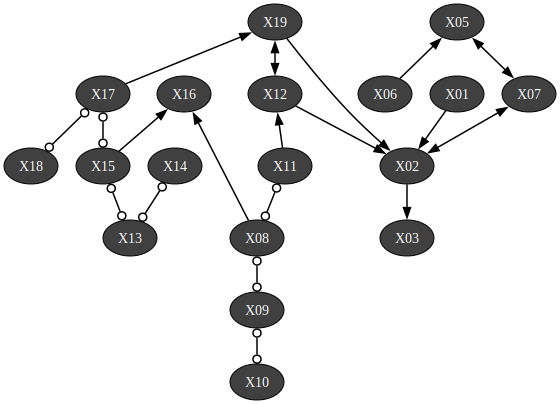

### Causal differences

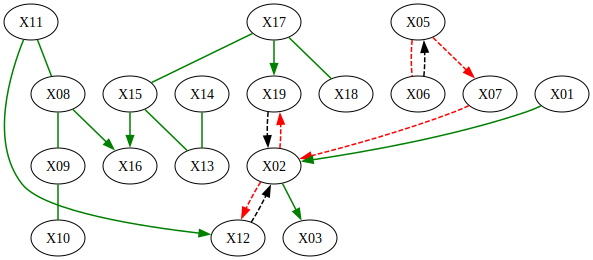

CPU times: user 24.2 s, sys: 1.22 s, total: 25.4 s
Wall time: 2.8 s
CPU times: user 12.8 s, sys: 669 ms, total: 13.5 s
Wall time: 1.53 s


## Results of the data/bn-20n-20a-2-test8.csv

### Markov equivalence class (PAG)

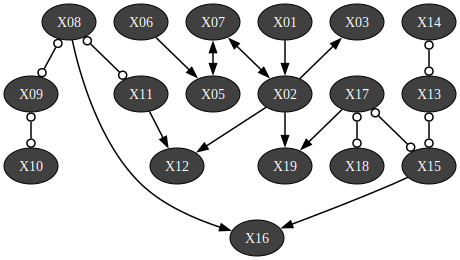

### Causal differences

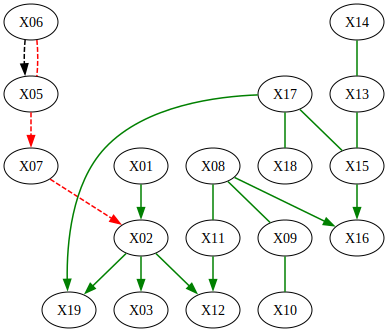

In [6]:
from pathlib import Path

for name in Path("data/").glob("bn-20n-20a-2-test*"):
    df = pd.read_csv(name)
    df = df.drop(["X00", "X04"], axis=1)

    learner = gum.BNLearner(df)
    learner.useMIIC()
    
    %time gumPDAG = learner.learnPDAG()
    %time pag, _ = fci(learner, ruleVerbose=False)

    display(
        Markdown(f"## Results of the {name}"),
        Markdown("### Markov equivalence class (PAG)"),
        toDot(pag),
        Markdown("### Causal differences"),
        showCausalDifferences(pag, gumPDAG, learner.names())
    )